In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


import random



In [2]:
X = []
Y = []
All = []
with open('./src/train_simple_reg.csv', 'r') as f:
    print(f.readline())
    for line in f:
        data = line.split(',')
        _id = int(data[0])
        y = float(data[-1])
        x = [float(_x) for _x in data[1:-1]]
        
        X.append(x)
        Y.append(y)
        
        all_data = [float(_x) for _x in data[1:]]
        
        All.append(all_data)
        


id,f1,f2,f3,f4,f5,y



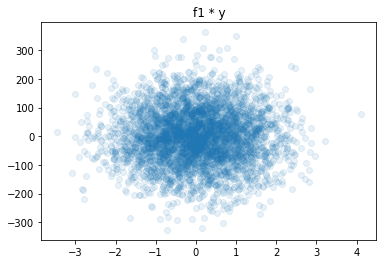

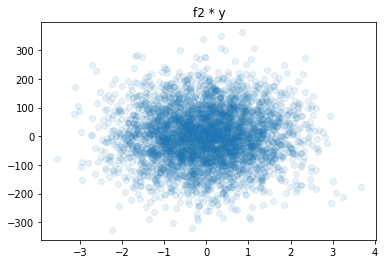

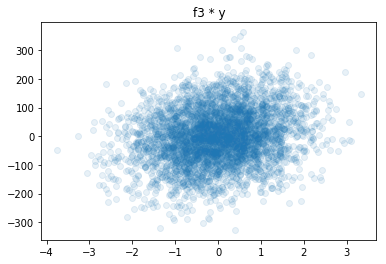

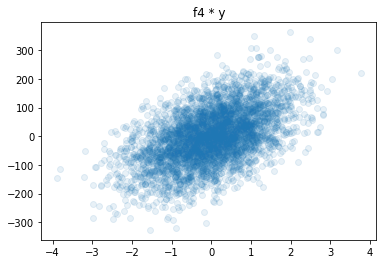

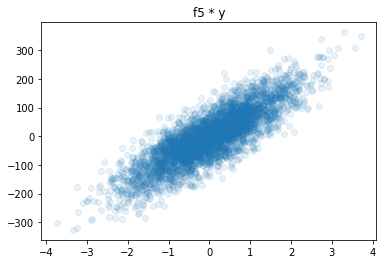

In [3]:
X = np.array(X)
Y = np.array(Y)
All = np.array(All)

for idx in range(5):
    plt.scatter(X[:,idx], Y, alpha=0.1)
    plt.title(f'f{idx+1} * y')
    plt.show()

In [4]:
_X = X[:,2:]
_X
W=np.array([4,5,10])

In [5]:
((_X.dot(W) - Y)**2).mean()**0.5

82.79007274469646

In [6]:
# суровая мутация. как детектив, только мутация
def mutation_A(W, probability=0.1):
    new_W = []
    id = 0
    for item in np.random.rand(*W.shape) > probability:
        if item:
            new_W.append(np.random.rand())
        else:
            new_W.append(W[id])
        id=id+1
    return new_W
mutation_A(W)

[0.1981531012105201, 5, 0.8172621981369041]

In [7]:
# лайтовая мутация.
def mutation_B(W, probability=0.1):
    new_W = []
    id = 0
    learning_rate = 0.2
    for item in np.random.rand(*W.shape) > probability:
        if item:
            new_W.append(np.random.randint(0, 2)-0.9*0.2 + W[id])
        else:
            new_W.append(W[id])
        id=id+1
    return new_W
mutation_B(W)

[4.82, 4.82, 9.82]

In [8]:
def copulatio(*W_list):
    W1, W2 = [np.copy(w) for w in W_list]
    p=0.5
    return np.choose(np.random.rand(*W1.shape)>p, (W1, W2))
copulatio([0,1,2,3,4,5], [6,7,8,9,10,11])

array([0, 1, 2, 3, 4, 5])

In [25]:
POPULATION_SIZE = 300

CROSSOVER_RATE = 0.3

MUTATION_A_RATE = 0.2

MUTATION_B_RATE = 0.1

In [26]:
POPULATION = np.random.randint(low=-40, high=40, size =(3, POPULATION_SIZE))
POPULATION

array([[-17, -31, -22, -37,  21,  19, -34, -10, -13,  22,   0,  27,  21,
        -31,   7, -37,  -9,  20, -26,  -2,  23,  33, -21, -33,  37,  -2,
         -6,  11,  30,   3,  17,  -8,  19, -26,  -4, -15,  38,  -7,  -4,
         24,  20, -39, -32,  31,  26, -28,  28,  -7,  37, -30, -16,   1,
         26,  39,  -1,   4,  18,  -3,  19,   0, -35, -14,  10,   8, -15,
          0,  -8, -37, -17,  16, -37, -22,  22,  39, -14,  23, -17,  29,
         -1, -21, -11,  31,  16,  26,  19, -34,  32,  16,   2,  32, -11,
         37, -12,  26,  -8,  13,  32, -27,  12,  28,  -2,  29, -10,  11,
        -29, -21, -37,  28,  22, -33, -19, -21,   0,  -5,  -8,  39, -28,
        -24,   2, -18, -31,  23,   1,  30, -19,  18,  19,  28, -27,  19,
         -5, -40, -18, -16, -21,   3,  17, -25, -20,  10,  -3,   3,   5,
          4,   2,  32,  34,  13,  11,  -6,  17, -12,  35,  32,  30,  33,
        -14,  20, -26,   0,  22,  30, -12, -16, -27, -38, -22,  30,  35,
         34,  28,  35,   7,  33,  30, -12,  30, -10

In [27]:
pop_loss = ((_X.dot(POPULATION).T-Y)**2).mean(axis=1)**0.5
sorted_loss = pop_loss[pop_loss.argsort()]
min_loss = sorted_loss[0]
max_loss = sorted_loss[-1]
print(min_loss, max_loss)


45.03054756306881 156.4044644305895


In [28]:
train_test_split_indices = np.arange(_X.shape[0])
np.random.shuffle(train_test_split_indices)

In [29]:
X_train, Y_train = _X[train_test_split_indices][:2000], Y[train_test_split_indices][:2000]
X_test, Y_test = _X[train_test_split_indices][2000:], Y[train_test_split_indices][2000:]

In [30]:
for epoch in range(1000):
    NEW_POPULATION = []
    
    for i in range(int(POPULATION_SIZE*MUTATION_A_RATE)):
        candidate = random.choice(POPULATION.T)
    #     print(candidate)
        new_candidate = mutation_A(candidate, 0.3)
    #     print(new_candidate)
        NEW_POPULATION.append(new_candidate)
        
    for i in range(int(POPULATION_SIZE*MUTATION_B_RATE)):
        candidate = random.choice(POPULATION.T)
    #     print(candidate)
        new_candidate = mutation_B(candidate, 0.3)
    #     print(new_candidate)
        NEW_POPULATION.append(new_candidate)
        
    for i in range(int(POPULATION_SIZE*CROSSOVER_RATE)):
        new_obj = copulatio(random.choice(POPULATION.T), random.choice(POPULATION.T))
        NEW_POPULATION.append(new_obj)
        
    best_obj_count = len(POPULATION.T) - len(NEW_POPULATION)
    
    BEST_OBJ = POPULATION.T[pop_loss.argsort()][:best_obj_count]
    
    POPULATION = np.vstack(
        [
            np.array(NEW_POPULATION),
            BEST_OBJ
        ]
    ).T
    
    pop_loss = ((X_train.dot(POPULATION).T-Y_train)**2).mean(axis=1)**0.5
    
    sorted_idx = pop_loss.argsort()
    sorted_loss = pop_loss[sorted_idx]
    most_best_obj = POPULATION.T[sorted_idx[0]]
    
    print('epoch', epoch, 'Test loss:', ((X_test.dot(most_best_obj)-Y_test)**2).mean()**0.5)
    min_loss = sorted_loss[0]
    max_loss = sorted_loss[-1]

epoch 0 Test loss: 44.90004853015462
epoch 1 Test loss: 44.90004853015462
epoch 2 Test loss: 43.46777425931962
epoch 3 Test loss: 43.46777425931962
epoch 4 Test loss: 43.46777425931962
epoch 5 Test loss: 43.46777425931962
epoch 6 Test loss: 43.46777425931962
epoch 7 Test loss: 43.46777425931962
epoch 8 Test loss: 42.80288182359662
epoch 9 Test loss: 42.48524058172912
epoch 10 Test loss: 42.48524058172912
epoch 11 Test loss: 41.6867402005389
epoch 12 Test loss: 41.662116739315834
epoch 13 Test loss: 41.662116739315834
epoch 14 Test loss: 41.662116739315834
epoch 15 Test loss: 41.1116527077829
epoch 16 Test loss: 41.1116527077829
epoch 17 Test loss: 41.1116527077829
epoch 18 Test loss: 40.87452692916524
epoch 19 Test loss: 40.050233839249735
epoch 20 Test loss: 40.050233839249735
epoch 21 Test loss: 40.050233839249735
epoch 22 Test loss: 40.050233839249735
epoch 23 Test loss: 39.06072275059419
epoch 24 Test loss: 39.06072275059419
epoch 25 Test loss: 39.06072275059419
epoch 26 Test loss:

epoch 215 Test loss: 9.193712641520818
epoch 216 Test loss: 9.066275440797304
epoch 217 Test loss: 8.597070604863408
epoch 218 Test loss: 8.07591749687581
epoch 219 Test loss: 8.07591749687581
epoch 220 Test loss: 7.578135564740799
epoch 221 Test loss: 7.578135564740799
epoch 222 Test loss: 7.2208673809187225
epoch 223 Test loss: 7.2208673809187225
epoch 224 Test loss: 6.930805099043867
epoch 225 Test loss: 6.319825070414254
epoch 226 Test loss: 6.160159482835261
epoch 227 Test loss: 6.160159482835261
epoch 228 Test loss: 6.160159482835261
epoch 229 Test loss: 6.160159482835261
epoch 230 Test loss: 6.160159482835261
epoch 231 Test loss: 6.160159482835261
epoch 232 Test loss: 6.025470913794718
epoch 233 Test loss: 6.025470913794718
epoch 234 Test loss: 5.987598279761689
epoch 235 Test loss: 5.906493742529132
epoch 236 Test loss: 5.74703207135714
epoch 237 Test loss: 5.74703207135714
epoch 238 Test loss: 5.408704031998811
epoch 239 Test loss: 5.366360848667698
epoch 240 Test loss: 5.3663

epoch 426 Test loss: 0.31231794687235914
epoch 427 Test loss: 0.31231794687235914
epoch 428 Test loss: 0.31231794687235914
epoch 429 Test loss: 0.31231794687235914
epoch 430 Test loss: 0.31231794687235914
epoch 431 Test loss: 0.31231794687235914
epoch 432 Test loss: 0.31231794687235914
epoch 433 Test loss: 0.31231794687235914
epoch 434 Test loss: 0.31231794687235914
epoch 435 Test loss: 0.31231794687235914
epoch 436 Test loss: 0.31231794687235914
epoch 437 Test loss: 0.31231794687235914
epoch 438 Test loss: 0.31231794687235914
epoch 439 Test loss: 0.31231794687235914
epoch 440 Test loss: 0.31231794687235914
epoch 441 Test loss: 0.31231794687235914
epoch 442 Test loss: 0.31231794687235914
epoch 443 Test loss: 0.31231794687235914
epoch 444 Test loss: 0.31231794687235914
epoch 445 Test loss: 0.31231794687235914
epoch 446 Test loss: 0.31231794687235914
epoch 447 Test loss: 0.31231794687235914
epoch 448 Test loss: 0.31231794687235914
epoch 449 Test loss: 0.31231794687235914
epoch 450 Test l

epoch 634 Test loss: 0.31231794687235914
epoch 635 Test loss: 0.31231794687235914
epoch 636 Test loss: 0.31231794687235914
epoch 637 Test loss: 0.31231794687235914
epoch 638 Test loss: 0.31231794687235914
epoch 639 Test loss: 0.31231794687235914
epoch 640 Test loss: 0.31231794687235914
epoch 641 Test loss: 0.31231794687235914
epoch 642 Test loss: 0.31231794687235914
epoch 643 Test loss: 0.31231794687235914
epoch 644 Test loss: 0.31231794687235914
epoch 645 Test loss: 0.31231794687235914
epoch 646 Test loss: 0.31231794687235914
epoch 647 Test loss: 0.31231794687235914
epoch 648 Test loss: 0.31231794687235914
epoch 649 Test loss: 0.31231794687235914
epoch 650 Test loss: 0.31231794687235914
epoch 651 Test loss: 0.31231794687235914
epoch 652 Test loss: 0.31231794687235914
epoch 653 Test loss: 0.31231794687235914
epoch 654 Test loss: 0.31231794687235914
epoch 655 Test loss: 0.31231794687235914
epoch 656 Test loss: 0.31231794687235914
epoch 657 Test loss: 0.31231794687235914
epoch 658 Test l

epoch 839 Test loss: 0.31231794687235914
epoch 840 Test loss: 0.31231794687235914
epoch 841 Test loss: 0.31231794687235914
epoch 842 Test loss: 0.31231794687235914
epoch 843 Test loss: 0.31231794687235914
epoch 844 Test loss: 0.31231794687235914
epoch 845 Test loss: 0.31231794687235914
epoch 846 Test loss: 0.31231794687235914
epoch 847 Test loss: 0.31231794687235914
epoch 848 Test loss: 0.31231794687235914
epoch 849 Test loss: 0.31231794687235914
epoch 850 Test loss: 0.31231794687235914
epoch 851 Test loss: 0.31231794687235914
epoch 852 Test loss: 0.31231794687235914
epoch 853 Test loss: 0.31231794687235914
epoch 854 Test loss: 0.31231794687235914
epoch 855 Test loss: 0.31231794687235914
epoch 856 Test loss: 0.31231794687235914
epoch 857 Test loss: 0.31231794687235914
epoch 858 Test loss: 0.31231794687235914
epoch 859 Test loss: 0.31231794687235914
epoch 860 Test loss: 0.31231794687235914
epoch 861 Test loss: 0.31231794687235914
epoch 862 Test loss: 0.31231794687235914
epoch 863 Test l

In [33]:
most_best_obj

array([17.78, 48.42, 77.64])

In [34]:
Xtest = []
Ytest = []
ID = []
with open('./src/test_data_simple_reg.csv', 'r') as f:
    print(f.readline())
    for line in f:
        data = line.split(',')
        _id = int(data[0])
        y = float(data[-1])
        x = [float(_x) for _x in data[1:]]
        
        ID.append(_id)
        Xtest.append(x)


id,f1,f2,f3,f4,f5



In [35]:
Xtest = np.array(Xtest)
Ytest = []

In [36]:
Xtest

array([[ 0.2792066 ,  1.16249803,  2.30958627, -1.8945449 , -0.59326735],
       [-0.8004779 , -1.30670378,  0.26431358,  1.04567154, -0.34619676],
       [ 0.26461917,  2.72806125, -0.57301071,  0.1294317 ,  0.31849361],
       ...,
       [-1.80250274,  1.21102754, -0.06093642, -0.66868357,  0.33629607],
       [-0.53912127,  0.02144329, -1.07816718,  0.2168838 ,  0.05240968],
       [-0.53737587, -0.11286944, -0.82219981, -0.23054688, -0.74382173]])

In [37]:
_Xtest = Xtest[:,2:]
Ytest = _Xtest.dot(most_best_obj)
Ytest

array([-9.67306969e+01,  2.84521945e+01,  2.08067965e+01,  5.30271103e+01,
       -5.28035123e+01, -4.34957273e+01,  3.35244319e+01,  2.00935794e+01,
       -2.35051846e+02, -2.72392234e+02, -7.76572157e+01,  1.43584443e+01,
        7.29307260e+01,  9.85122808e+01,  1.77289589e+02, -1.06434458e+02,
       -2.50201150e+01,  8.42202071e+01, -1.31200971e+02,  2.06504278e+01,
        1.90999435e+00, -6.18760203e+01,  1.99138238e+01, -1.93543222e+02,
       -4.32618520e+01, -8.61105892e+01,  1.62669723e+02, -1.80006497e+01,
        5.26322365e+01, -5.78312218e+01, -6.81050590e+01, -1.68258429e+02,
       -7.32710187e+01, -1.60347067e+01,  3.07359263e+01, -5.30443486e+01,
        7.41530784e+01,  2.58858625e+01,  6.37445660e+01, -2.62782032e+01,
        1.37651456e+02, -9.23325162e+01,  3.82722207e+01, -6.73349681e+01,
       -1.11059123e+02, -1.49014108e+02,  4.91018351e+01,  1.42994642e+02,
       -1.19848914e+02,  8.46531801e+01,  2.37127959e+02, -4.32203310e+01,
       -2.70796162e+01, -

In [300]:
Ytest = np.array(Ytest)
Ytest.shape
result = []
for idx,line in enumerate(Ytest):
    result.append([idx, line])
    

In [301]:
np.savetxt("random_sol.csv", result, fmt='%i, %f',  delimiter=',', header="id,y", comments='')